# Making a trial by trial fit of faceWord data and using that for searchligth classificiation

This tutorial will load models and data from tutorial 13 and change the design matrix to one that gives a beta estimate for each trial.

In [1]:
# import some functionality
from datetime import datetime

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
import os
import pip
os.system('python3 -m pip install numpy')
os.system('python3 -m pip install matplotlib')
os.system('python3 -m pip install scipy')
os.system('python3 -m pip install panda')
os.system('python3 -m pip install nilearn')
os.system('python3 -m pip install sklearn')
os.system('python3 -m pip install pickle')
os.system('python3 -m pip install atlasreader')
os.system('python3 -m pip install seaborn')

#import os.path as op
import numpy as np
#from numpy.linalg import inv
#import nibabel as nib
import matplotlib.pyplot as plt
#from scipy.ndimage import gaussian_filter

%matplotlib inline

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 11:57:22
Finishing cell: 11:57:36


In [2]:
import pickle

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

# Getting the first level models from tutorial 13:
f = open('/work/JiaqiZhao#1783/MRI_results/WordFace_first_level_models_concrete.pkl', 'rb')
models, models_run_imgs, models_events, models_confounds = pickle.load(f)
f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 11:57:58


/opt/conda/lib/python3.10/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


Finishing cell: 11:58:31


### Figuring out what is in the models_events variable

In [4]:
#print(models_events[13])
print(models_confounds[13][0].shape)
ons=models_events[13][0]['onset']

for ii in range(len(models_events[13])):
    print(models_events[13][ii])
    
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

(610, 22)
          onset  duration trial_type
0      7.313939  0.689690  image_pos
1     14.717063  0.686646  image_pos
2     27.319724  0.684149  image_pos
3     34.728828  0.675063  image_neg
4     47.327022  0.677084  image_pos
..          ...       ...        ...
115  551.043728  0.697427   abstract
116  561.043533  0.697893   abstract
117  571.045231  0.696205   abstract
118  581.043450  0.698045   concrete
119  591.043921  0.697669   abstract

[120 rows x 3 columns]
          onset  duration trial_type
0      4.716550  0.690033  image_neg
1     17.329757  0.676861  image_pos
2     27.323017  0.683735  image_pos
3     34.729856  0.676977  image_neg
4     44.722518  0.684384  image_neg
..          ...       ...        ...
115  551.296482  0.697609   concrete
116  561.314468  0.696312   abstract
117  571.329356  0.698288   concrete
118  581.329809  0.697779   concrete
119  591.329773  0.697809   concrete

[120 rows x 3 columns]
          onset  duration trial_type
0      7.305710  

## Creating new design matrices with a column per experimental trial.

In [5]:
import pandas as pd
from nilearn.glm.first_level import make_first_level_design_matrix
import numpy as np
lsa_dm=[]

for ii in range(len(models_events[13])):
    #print(models_events[0][ii])
    #N=number of events
    N=models_events[13][ii].shape[0]
    t_fmri = np.linspace(0, 610,610,endpoint=False)
    # We have to create a dataframe with onsets/durations/trial_types
    # No need for modulation!
    trials = pd.DataFrame(models_events[13][ii], columns=['onset'])
    trials.loc[:, 'duration'] = 0.7
    trials.loc[:, 'trial_type'] = ['t_'+str(i).zfill(3) + '_' + models_events[21][ii]['trial_type'][i-1]  for i in range(1, N+1)]

    # lsa_dm = least squares all design matrix
    lsa_dm.append(make_first_level_design_matrix(
        frame_times=t_fmri,  # we defined this earlier 
        events=trials,
        add_regs=models_confounds[13][ii], #Add the confounds from fmriprep
        hrf_model='glover',
        drift_model='cosine'  
    ))
    




now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Finishing cell: 12:04:00


In [6]:
models_events[13]

[          onset  duration trial_type
 0      7.313939  0.689690  image_pos
 1     14.717063  0.686646  image_pos
 2     27.319724  0.684149  image_pos
 3     34.728828  0.675063  image_neg
 4     47.327022  0.677084  image_pos
 ..          ...       ...        ...
 115  551.043728  0.697427   abstract
 116  561.043533  0.697893   abstract
 117  571.045231  0.696205   abstract
 118  581.043450  0.698045   concrete
 119  591.043921  0.697669   abstract
 
 [120 rows x 3 columns],
           onset  duration trial_type
 0      4.716550  0.690033  image_neg
 1     17.329757  0.676861  image_pos
 2     27.323017  0.683735  image_pos
 3     34.729856  0.676977  image_neg
 4     44.722518  0.684384  image_neg
 ..          ...       ...        ...
 115  551.296482  0.697609   concrete
 116  561.314468  0.696312   abstract
 117  571.329356  0.698288   concrete
 118  581.329809  0.697779   concrete
 119  591.329773  0.697809   concrete
 
 [120 rows x 3 columns],
           onset  duration trial_t

### Check out the created design matrix
Note that the index represents the frame times

In [7]:
print(lsa_dm)

[       t_001_image_pos  t_002_image_pos  t_003_image_pos  t_004_image_neg  \
0.0                0.0              0.0              0.0              0.0   
1.0                0.0              0.0              0.0              0.0   
2.0                0.0              0.0              0.0              0.0   
3.0                0.0              0.0              0.0              0.0   
4.0                0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
605.0              0.0              0.0              0.0              0.0   
606.0              0.0              0.0              0.0              0.0   
607.0              0.0              0.0              0.0              0.0   
608.0              0.0              0.0              0.0              0.0   
609.0              0.0              0.0              0.0              0.0   

       t_005_image_neg  t_006_image_neg  t_007_image_pos  t_008_image_pos 

## Plot the new design matrices

Finishing cell: 12:04:46


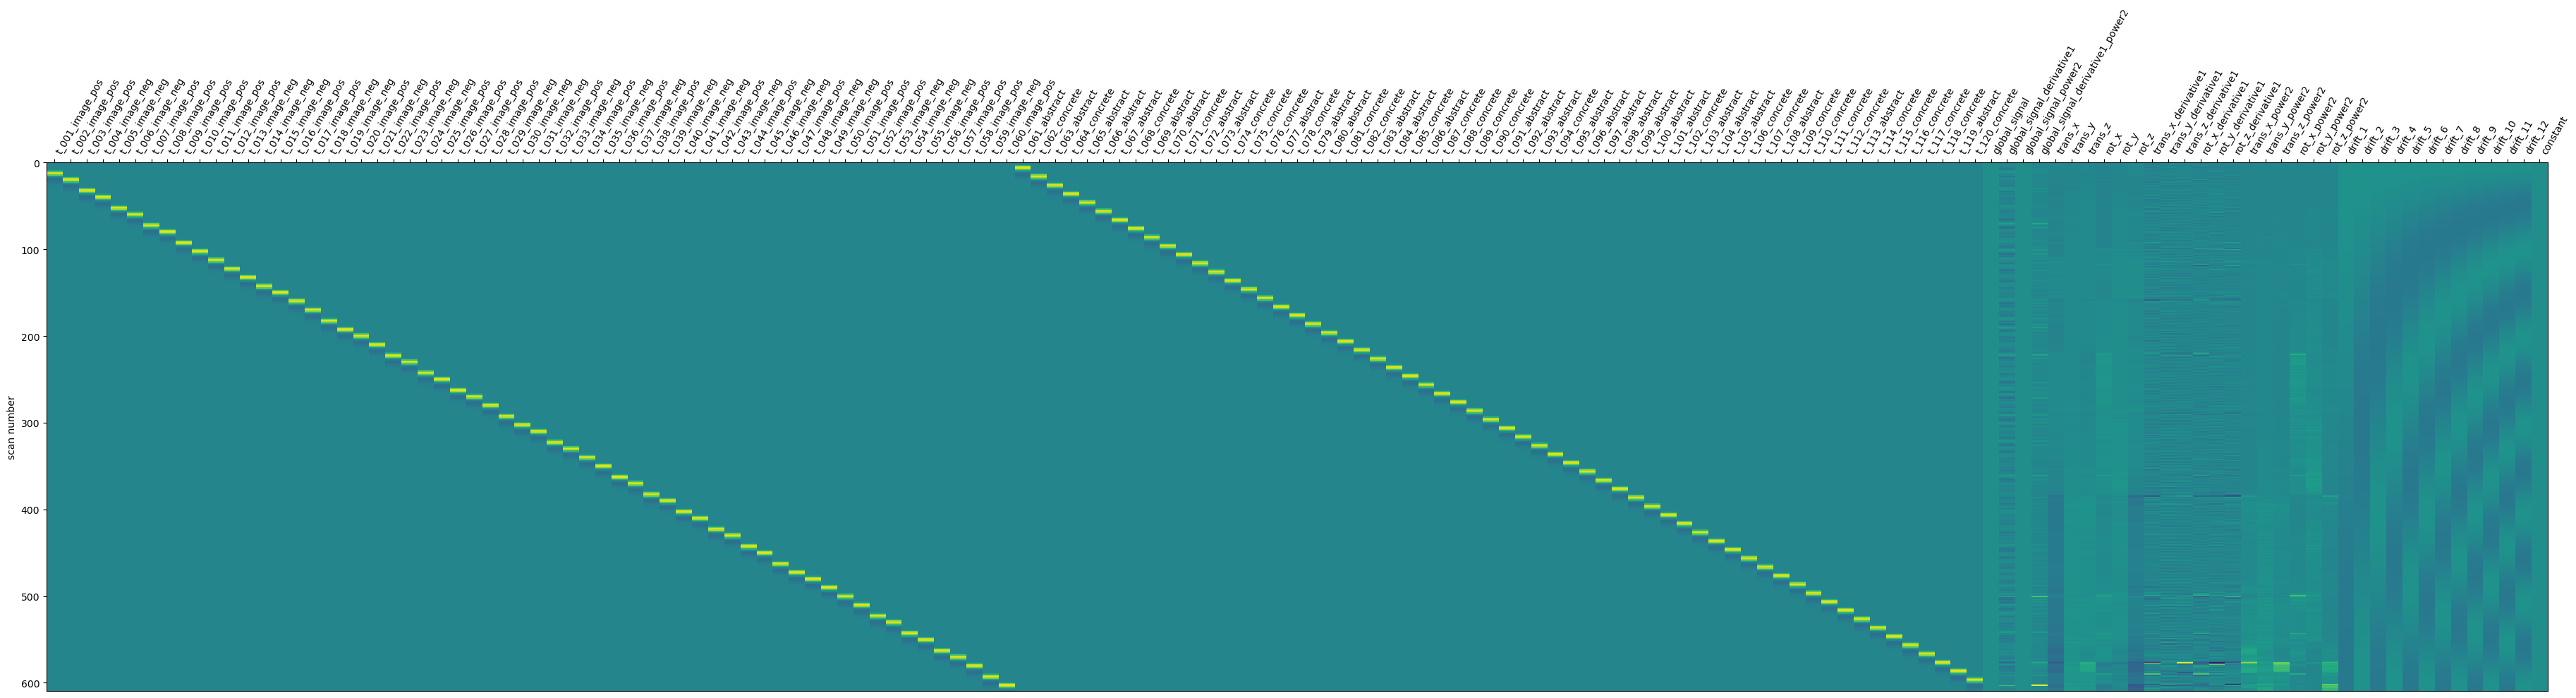

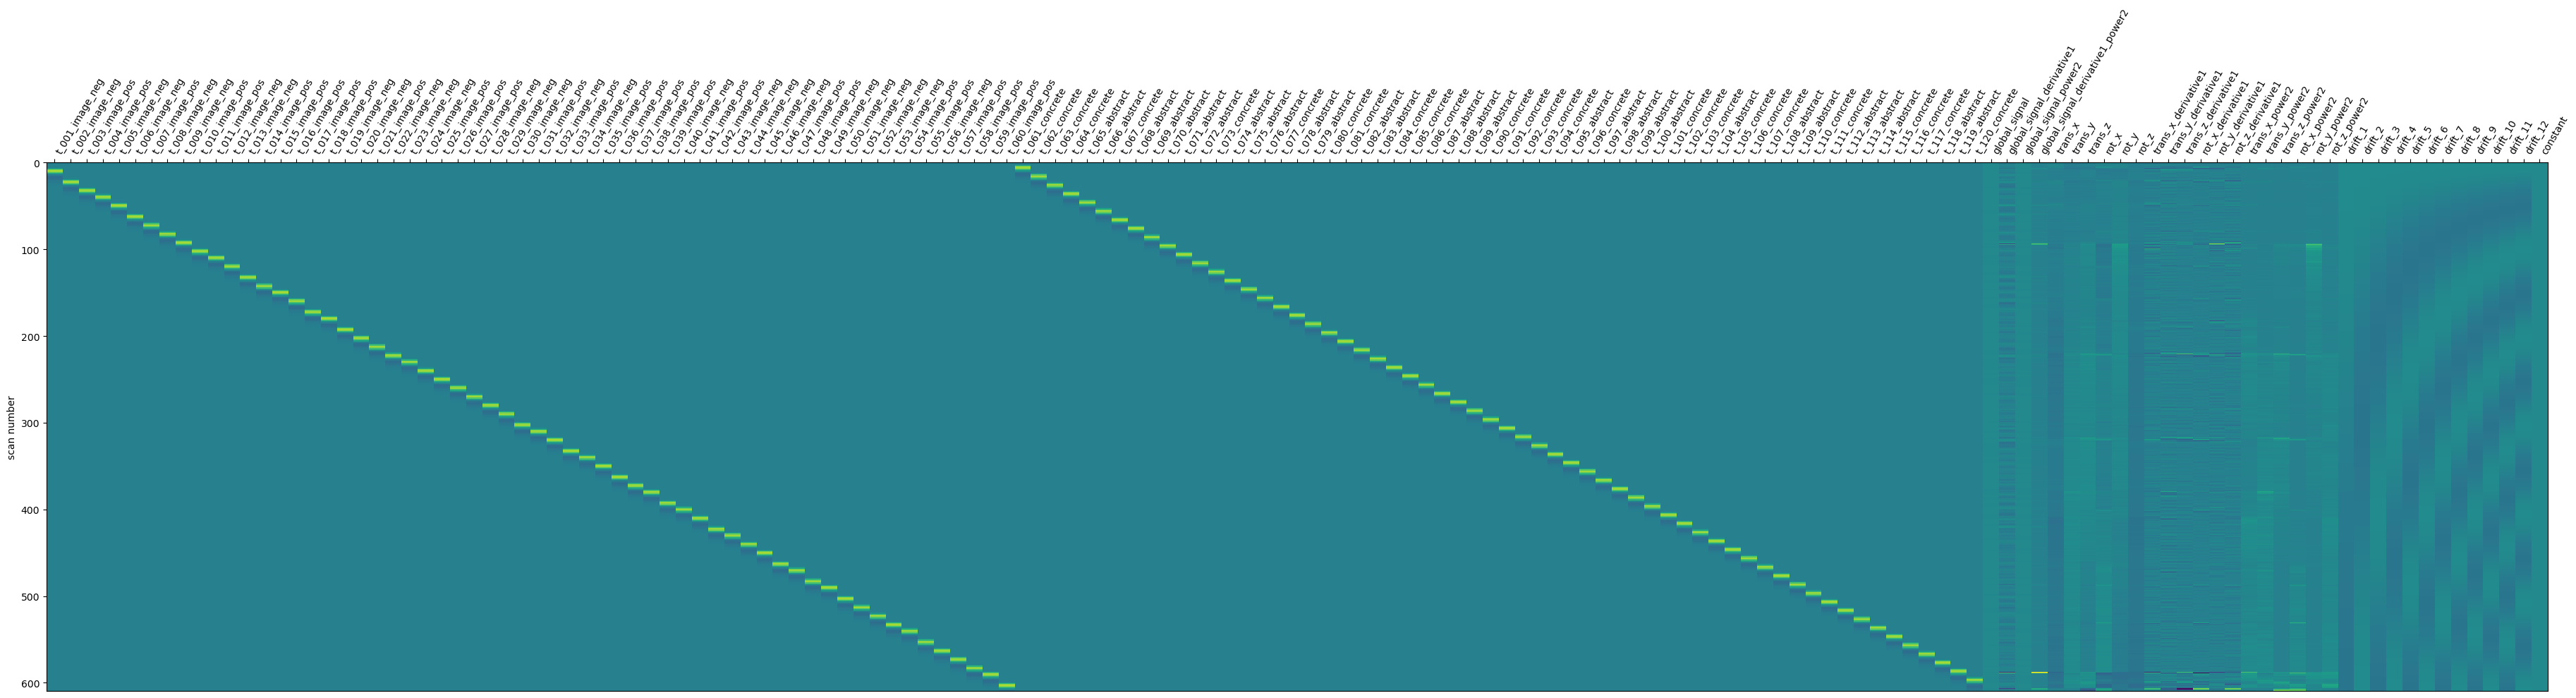

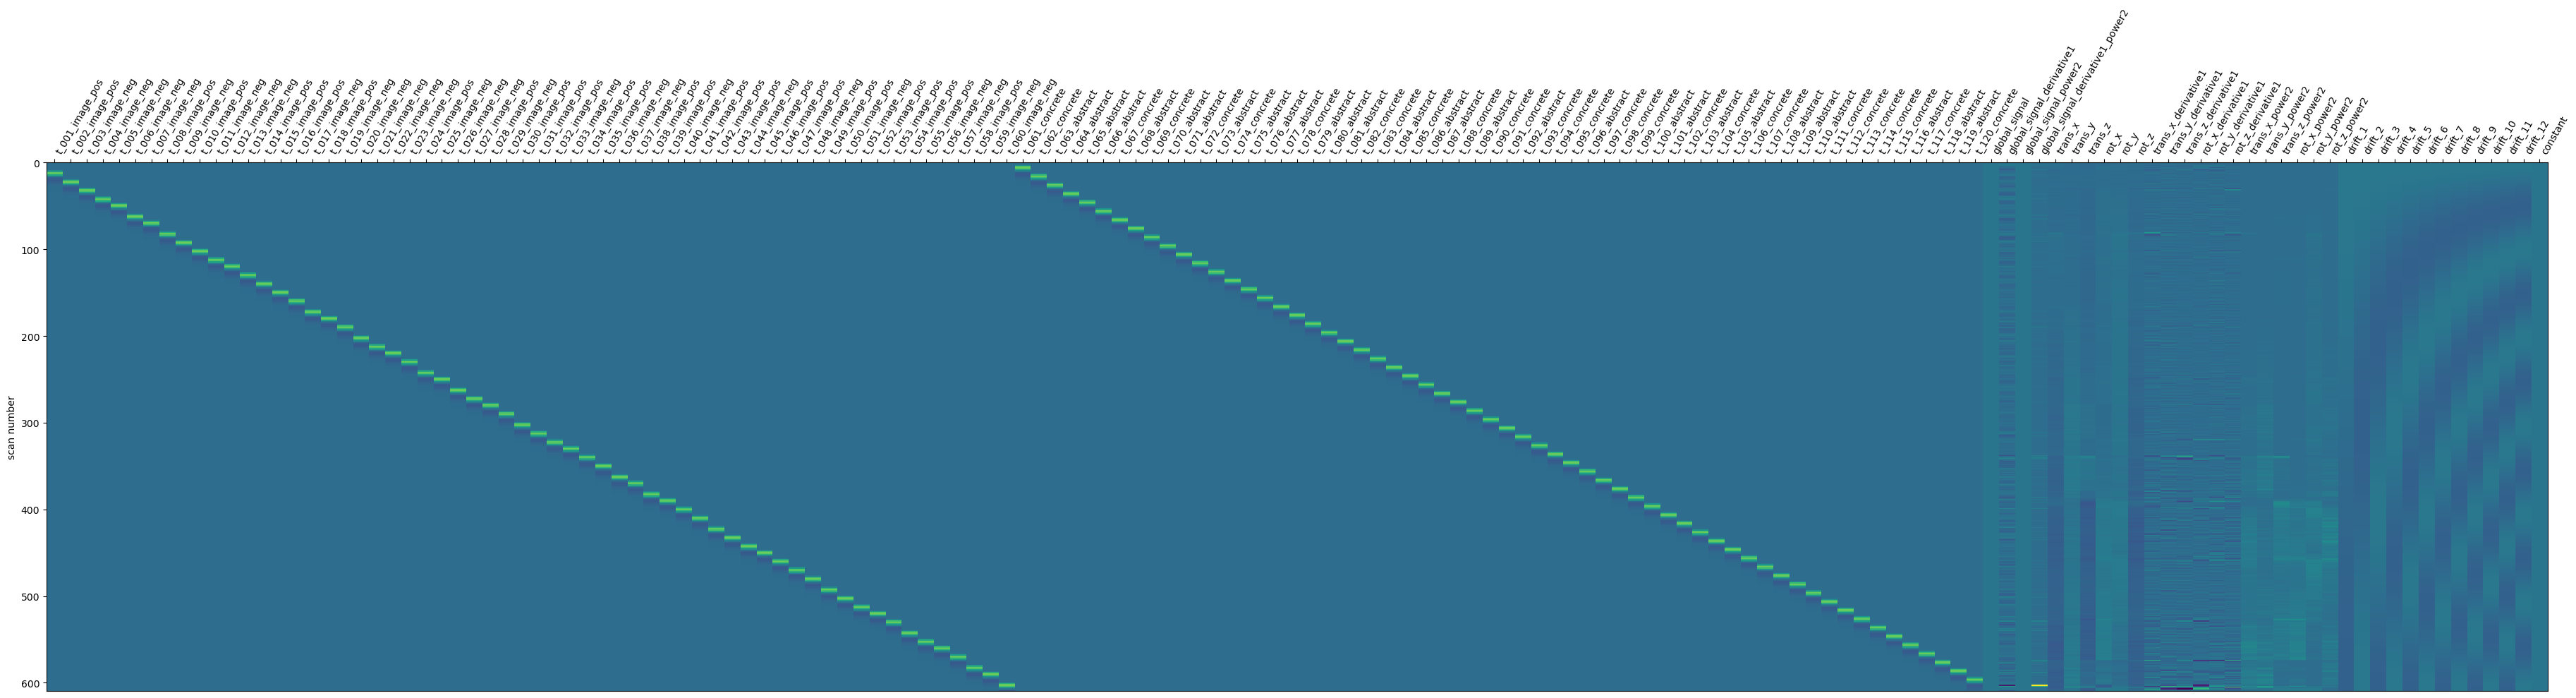

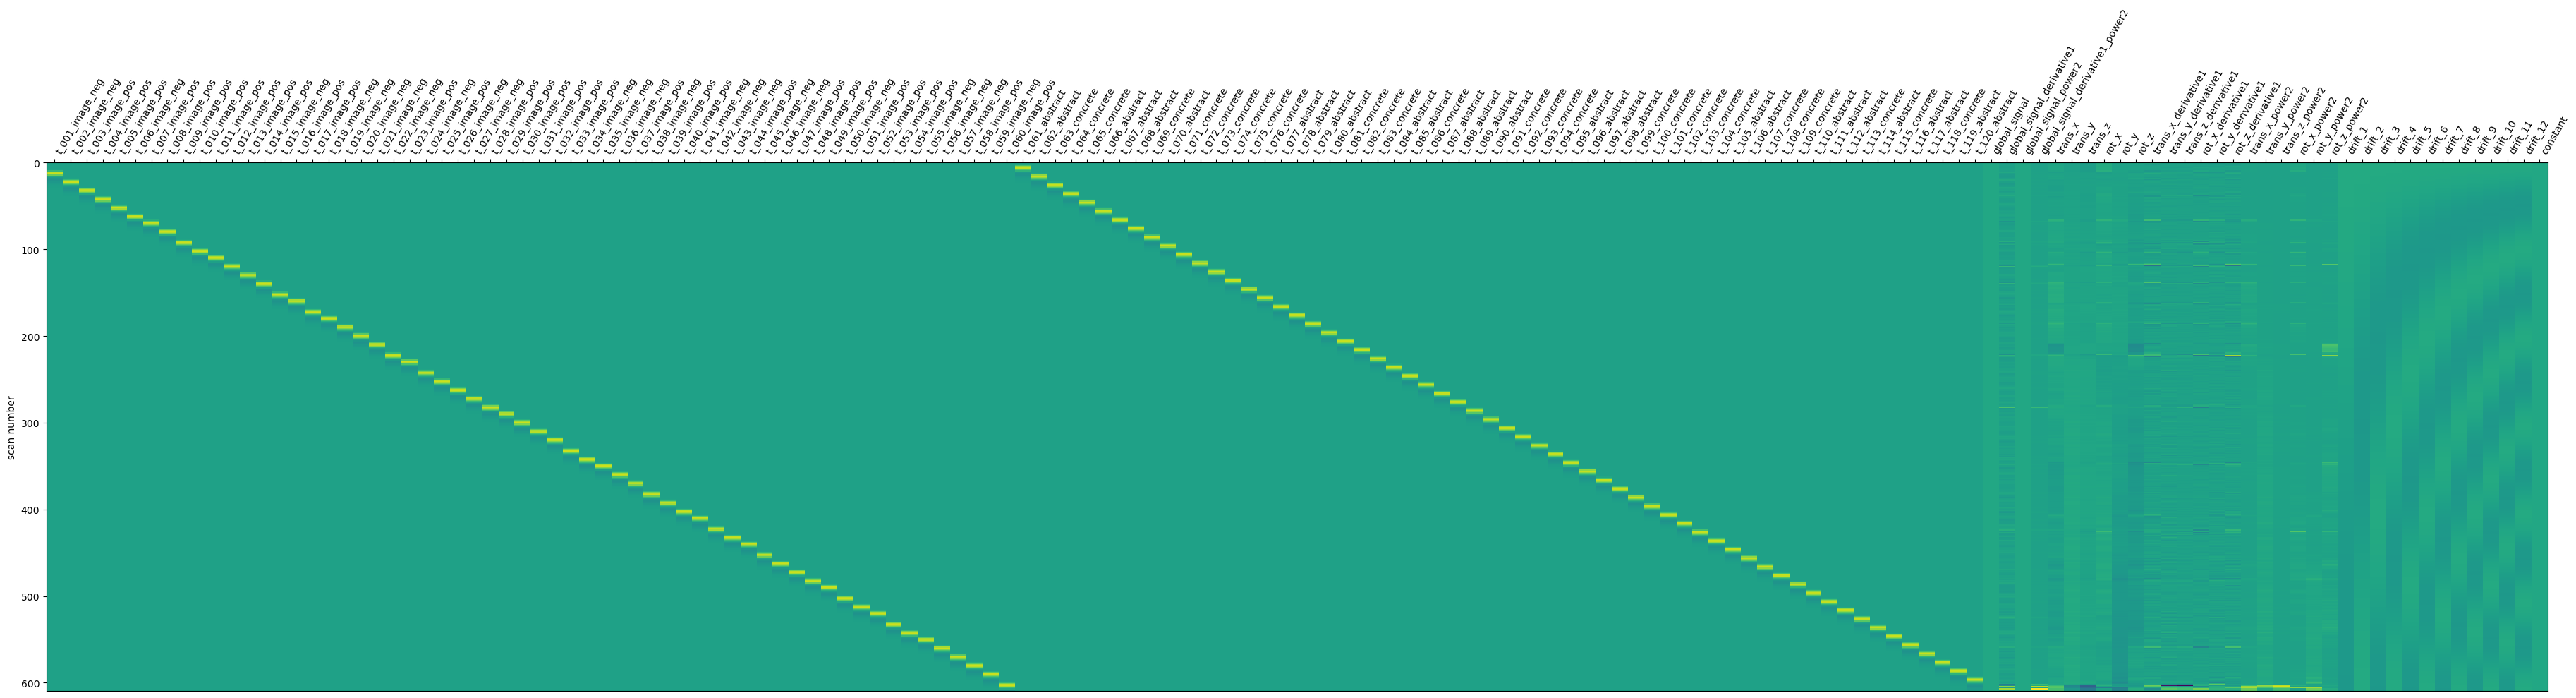

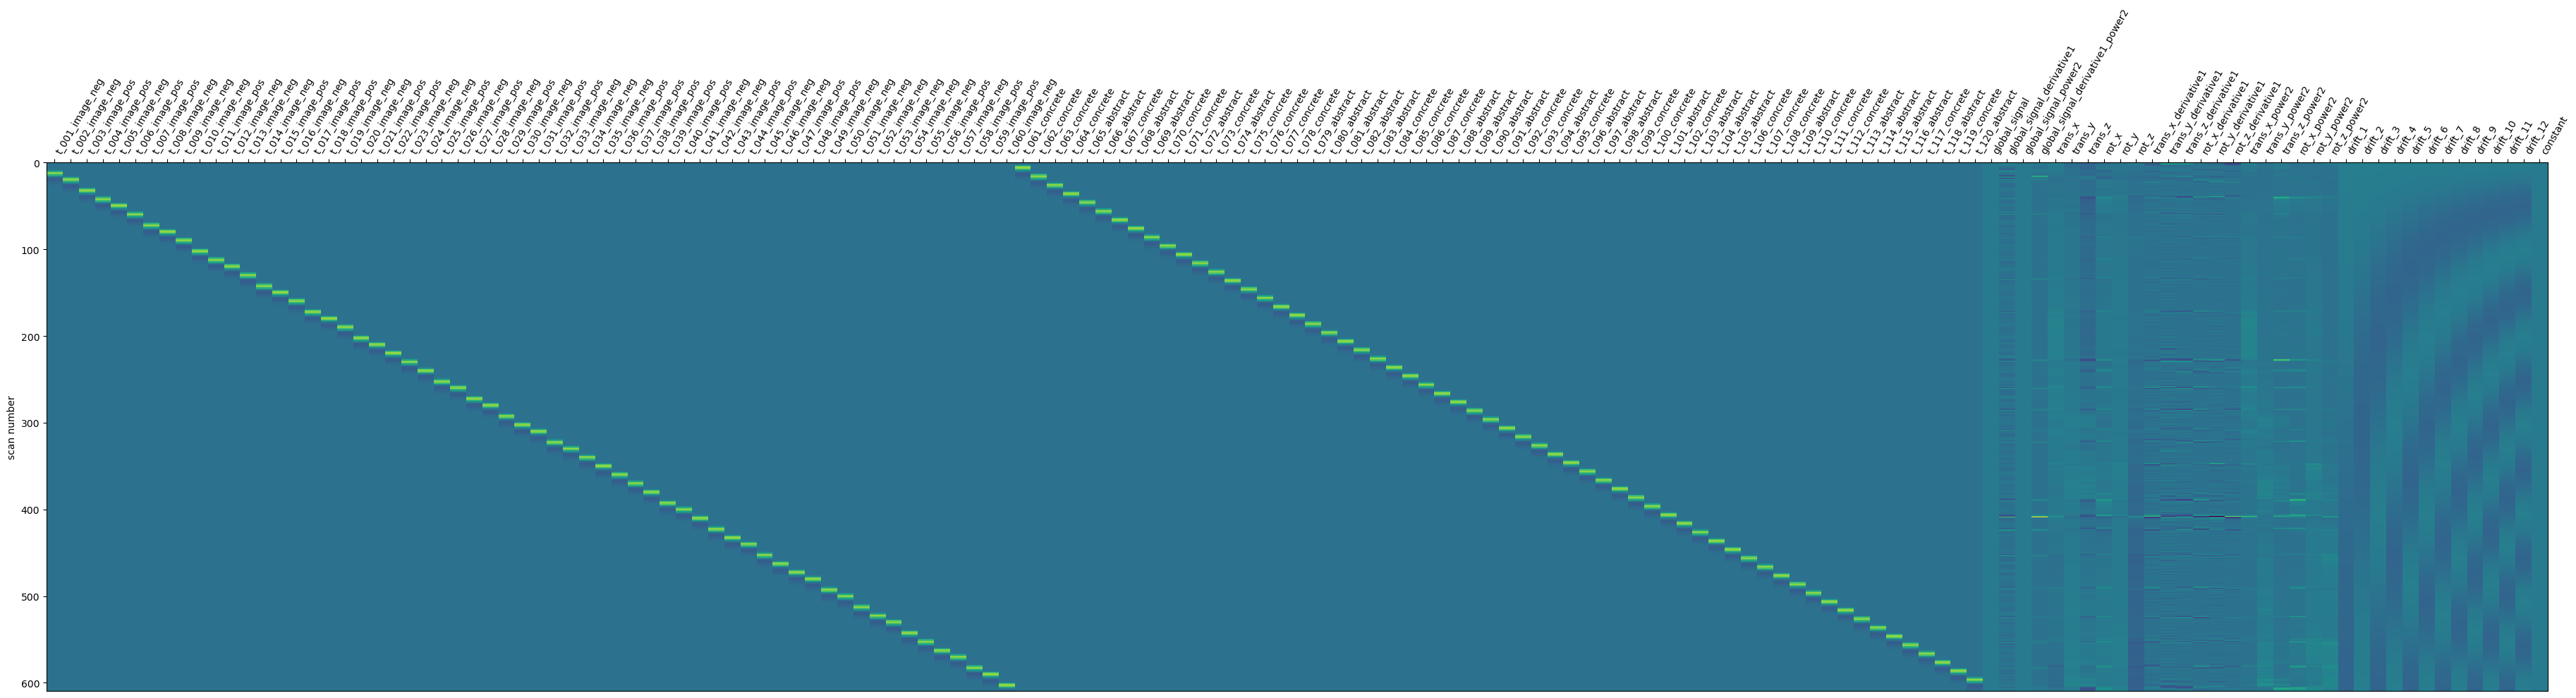

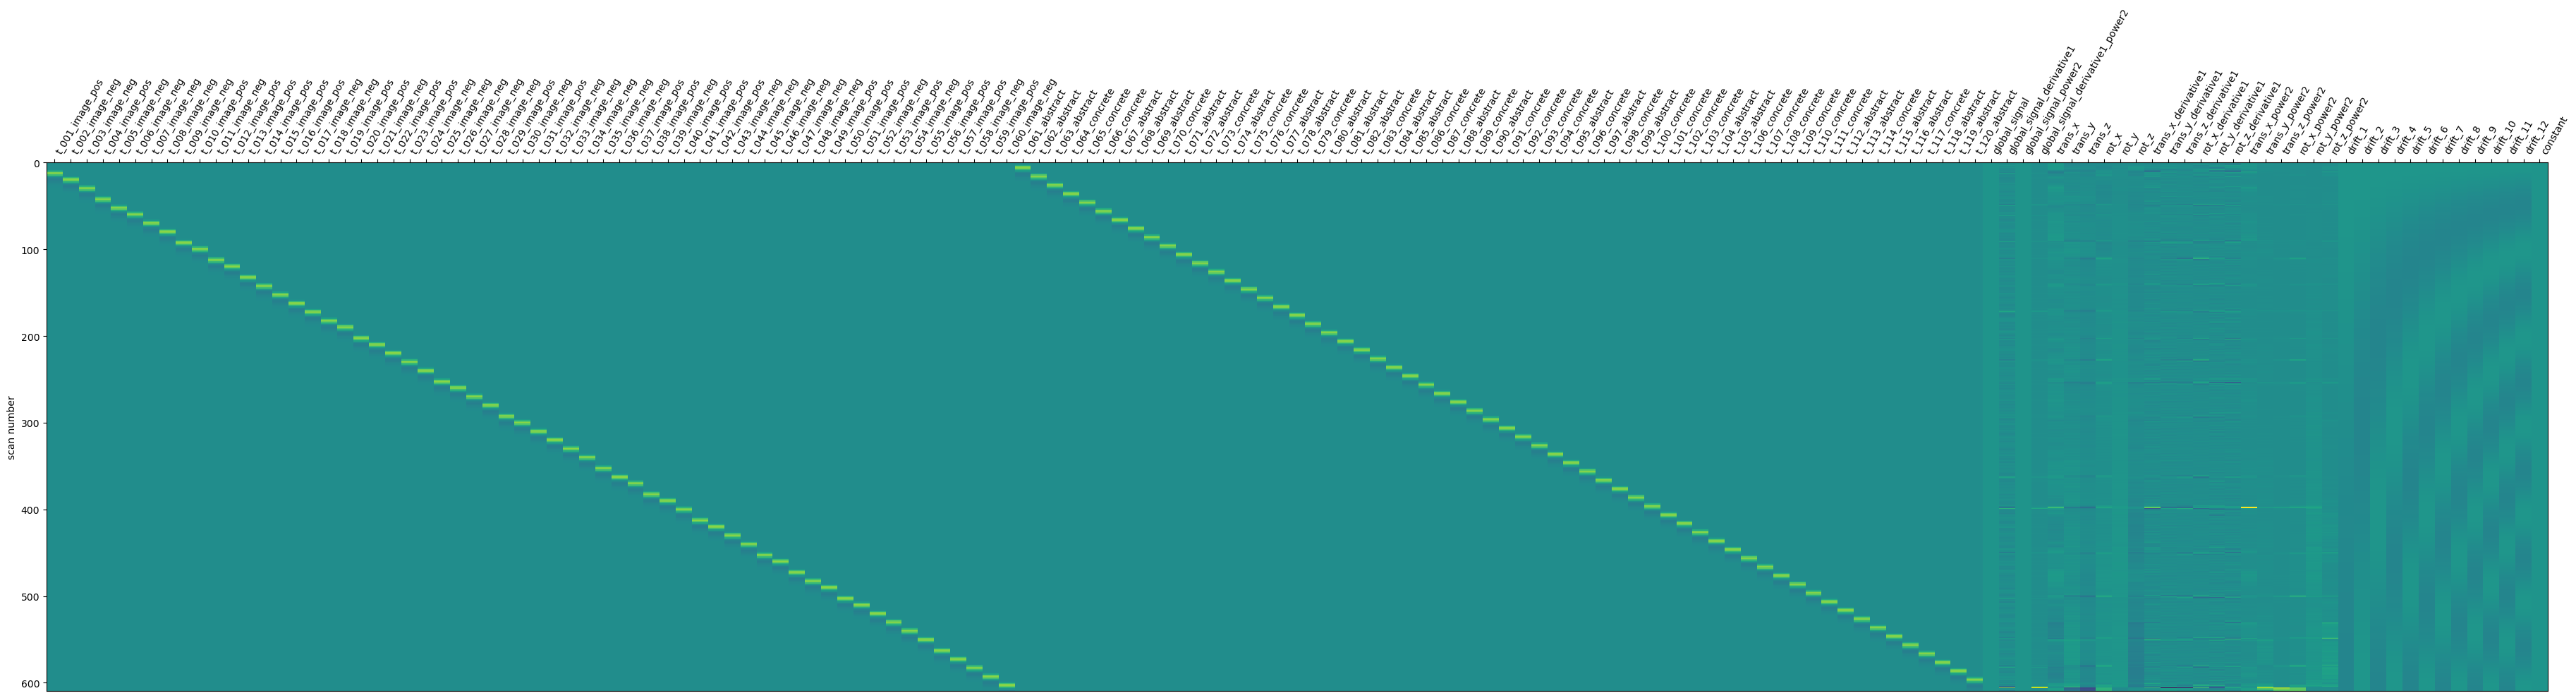

In [8]:
from nilearn.plotting import plot_design_matrix
for ii in range(len(models_events[13])):
    plot_design_matrix(lsa_dm[ii]);

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

### Let's inspect the correlational structure of the design matrix

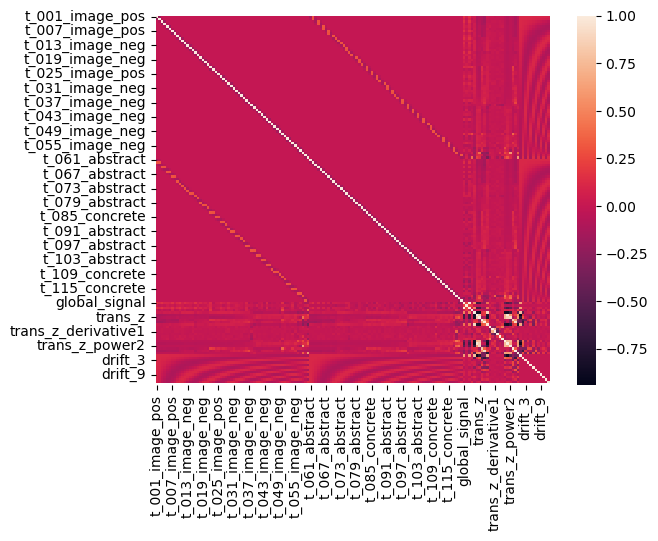

In [11]:
import seaborn as sns
dm_corr=lsa_dm[0].corr()
p1 = sns.heatmap(dm_corr)

## Fit the models for all sessions from one participant

In [12]:

from nilearn.glm.first_level import FirstLevelModel

model1=[]
for ii in range(len(models_events[13])):
    
    # Get data and model info for 1st participant, 1st session
    imgs1=models_run_imgs[13][ii]
    model1.append (FirstLevelModel())
    #Fit the model
    print('Fitting a GLM')
    model1[ii].fit(imgs1,design_matrices=lsa_dm[ii])

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Fitting a GLM
Fitting a GLM
Fitting a GLM
Fitting a GLM
Fitting a GLM
Fitting a GLM
Finishing cell: 12:24:27


## Saving/retrieving the fitted models and design matrices

In [13]:
import pickle

# Saving the objects:
f = open('/work/JiaqiZhao#1783/MRI_results/P13_WordFace_first_level_models_all_trials_concrete.pkl', 'wb')
pickle.dump([model1, lsa_dm], f)
f.close()

## Getting back the objects:
#f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials.pkl', 'rb')
#model1, lsa_dm = pickle.load(f)
#f.close()

#print(model1[0])
#now = datetime.now()
#print('Finishing cell:',now.strftime("%H:%M:%S"))

## Making z-map contrasts from the fitted model to use in later analyses

In [14]:

z_maps = []
conditions_label = []

for ii in range(len(models_events[13])):
    N=models_events[13][ii].shape[0]
    #Make an identity matrix with N= number of trials
    contrasts=np.eye(N)
    print(contrasts.shape)
    #Find difference between columns in design matrix and number of trials
    dif=lsa_dm[ii].shape[1]-contrasts.shape[1]
    print(dif)
    #Pad with zeros
    contrasts=np.pad(contrasts, ((0,0),(0,dif)),'constant')
    print(contrasts.shape)
    for i in range(N):
        #Add a z-contrast image from each trial
        z_maps.append(model1[ii].compute_contrast(contrasts[i,], output_type='z_score'))
        # Make a variable with condition labels for use in later classification
        conditions_label.append(models_events[13][ii]['trial_type'][i])
#        session_label.append(session)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

(120, 120)
35
(120, 155)
(120, 120)
35
(120, 155)
(120, 120)
35
(120, 155)
(120, 120)
35
(120, 155)
(120, 120)
35
(120, 155)
(120, 120)
35
(120, 155)
Finishing cell: 12:29:10


## Saving models and z_maps

In [15]:
import pickle

#Save the first level models

# Saving the objects:
f = open('/work/JiaqiZhao#1783/MRI_results/P13_WordFace_first_level_models_all_trials_concrete_zmap.pkl', 'wb')
pickle.dump([model1, lsa_dm, conditions_label, z_maps], f)
f.close()

# Getting back the objects:
#f = open('store.pckl', 'rb')
#model1, lsa_dm, conditions_label, z_maps = pickle.load(f)
#f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Finishing cell: 12:29:15


## Reshape data for classification

In [16]:

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

import numpy as np
#from nilearn import datasets
from nilearn.image import new_img_like, load_img, index_img, clean_img
from sklearn.model_selection import train_test_split, GroupKFold
n_trials=len(conditions_label)
print(n_trials)


# Reshaping data------------------------------
from nilearn.image import index_img, concat_imgs
idx_abs=[int(i) for i in range(len(conditions_label)) if conditions_label[i]=='abstract']
idx_con=[int(i) for i in range(len(conditions_label)) if conditions_label[i]=='concrete']

#Concatenate trials
idx=np.concatenate((idx_abs, idx_con))
print(idx)

conditions=np.array(conditions_label)[idx]
z_maps_conc=concat_imgs(z_maps)
print(z_maps_conc.shape)
z_maps_img = index_img(z_maps_conc, idx)

print(z_maps_img.shape)


Starting cell: 12:29:15
720
[ 64  66  67  68  69  70  71  72  75  77  82  83  86  88  90  91  93  97
 100 102 103 104 106 107 109 110 114 115 116 117 119 182 184 185 188 192
 193 199 200 201 204 205 206 207 208 209 210 212 213 216 217 218 219 221
 222 225 228 230 232 234 236 300 301 306 308 312 313 314 316 318 320 323
 324 325 327 328 331 332 333 335 339 340 343 348 349 350 351 354 355 356
 359 420 424 425 426 428 429 430 432 434 436 437 440 442 444 445 446 449
 453 455 456 458 462 464 466 467 472 476 477 478 479 540 542 543 547 548
 550 553 554 558 559 561 563 564 566 570 574 575 576 578 580 584 586 587
 588 589 591 593 596 597 599 661 662 665 666 667 668 669 670 672 673 674
 675 679 680 681 683 684 685 689 693 694 698 699 701 704 708 712 716 717
 719  60  61  62  63  65  73  74  76  78  79  80  81  84  85  87  89  92
  94  95  96  98  99 101 105 108 111 112 113 118 180 181 183 186 187 189
 190 191 194 195 196 197 198 202 203 211 214 215 220 223 224 226 227 229
 231 233 235 237 238 23

## create training and testing vars on the basis of class labels

In [21]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
#conditions_img=conditions[idx]
#print(conditions_img)
#Make an index for spliting fMRI data with same size as class labels
idx2=np.arange(conditions.shape[0])

# create training and testing vars on the basis of class labels
idx1,idx2, conditions1,  conditions2 = train_test_split(idx2,conditions, test_size=0.2)
print(idx1, idx2)

# Reshaping data------------------------------
from nilearn.image import index_img
fmri_img1 = index_img(z_maps_img, idx1)
fmri_img2 = index_img(z_maps_img, idx2)
#Check data sizes
print(fmri_img1.shape)
print(fmri_img2.shape)

Starting cell: 12:48:38
[ 51 105 167 159  82 348 137 206 280  84  93  89 223 331  45  36 160 180
 221 111 199 162 169 341 144 126 305  99 230  77 224  13  70 284 161 299
  61 351 174 187 346  59 250 264 275  39 329 245 140  66 306 156 201  43
 121 332  81 255 247 265 145 357 103  86 356 198 202 151 179  44 262  31
 110 251 171 290 109  19 127 181 333 123 256 338   4 269 225 252 136  80
 353  55  88  76  58 282 312   0 303 287  71 242  28 281 106 143 277 339
 308 327  92  50  18 321 176 328 349 295 128 208  46 294 307 209  20  22
  63 258  26  69 293  95 279 177 274 170 220 196  52  79  25 320 288 286
 324 134 130 131 296 289 212  74 118 175 316 354  38  96 129 325 107 318
  83 152 292 150 153 233  30  11  29 237  98 304   6 246 268 101  12 114
 359 261 115 314 141 215   7 155 163 234 254 133 104 217  73   5 267 253
  21  85 352  42 345 297 309 200 120 278  40 344  90 335 336 213 113 272
 190 194 291 117  94 235 172   1 232 222  57  91  37 184 358 310 116 337
  41 138 146 197 210 193  9

## Prepare a searchlight analysis on the first split

Starting cell: 12:53:49


/tmp/ipykernel_3074/2149931239.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  process_mask = mask_img.get_fdata().astype(np.int)
/tmp/ipykernel_3074/2149931239.py:30: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  process_mask_img = new_img_like(mask_img, process_mask)


Finishing cell: 12:53:53


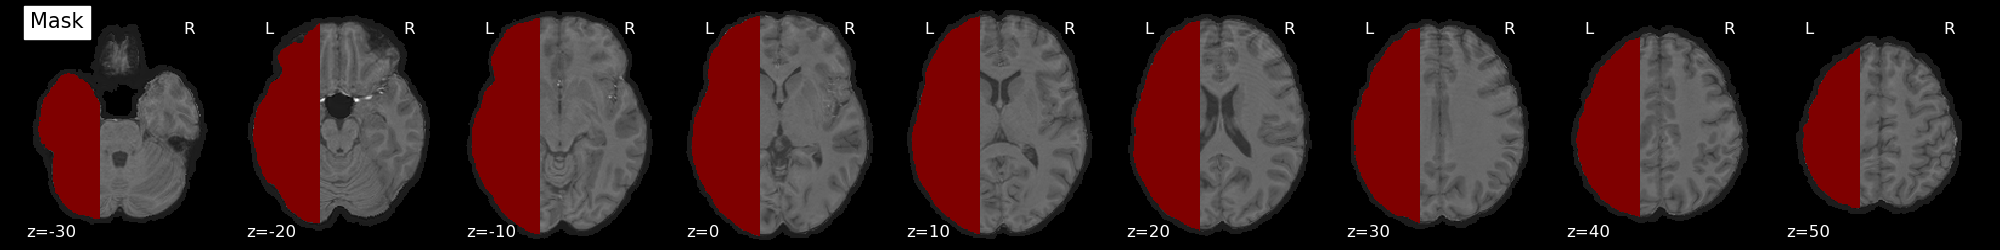

In [24]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
# -------------------
import pandas as pd
import numpy as np
from nilearn.image import new_img_like, load_img
from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn import decoding
from nilearn.decoding import SearchLight
from sklearn import naive_bayes, model_selection #import GaussianNB

#########################################################################
#Make a mask with only 10 slices
mask_wb_filename='/work/JiaqiZhao#1783/82777/BIDS/derivatives/sub-0081/anat/sub-0081_acq-T13D_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
#mask_wb_filename='/work/JiaqiZhao#1783/82777/BIDS/derivatives/sub-0081/anat/sub-0081_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
anat_filename='/work/JiaqiZhao#1783/82777/BIDS/derivatives/sub-0081/anat/sub-0081_acq-T13D_run-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
#anat_filename='/work/JiaqiZhao#1783/82777/BIDS/derivatives/sub-0081/anat/sub-0081_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
#Load the whole brain mask
mask_img = load_img(mask_wb_filename)


# .astype() makes a copy.
process_mask = mask_img.get_fdata().astype(np.int)
#Set slices below x in the z-dimension to zero (in voxel space)
process_mask[:,:,:40] = 0
#Set slices above x in the z-dimension to zero (in voxel space)
process_mask[:,:,150:] = 0

process_mask[80:,:,:] = 0
process_mask_img = new_img_like(mask_img, process_mask)


#Plot the searchlight scores on an anatomical background
plot_img(process_mask_img, bg_img=anat_filename,#bg_img=mean_fmri,
         title="Mask", display_mode="z",cut_coords=[-30,-20,-10,0,10,20,30,40,50],
         vmin=.40, cmap='jet', threshold=0.9, black_bg=True)
#########################################################################


#########################################################################

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

## Run the searchlight analysis

In [25]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
#n_jobs=-1 means that all CPUs will be used

from nilearn.decoding import SearchLight
from sklearn.svm import LinearSVC

# The radius is the one of the Searchlight sphere that will scan the volume
searchlight = SearchLight(
    mask_img,
    estimator=LinearSVC(penalty='l2'),
    process_mask_img=process_mask_img,
    radius=5, n_jobs=-1,
    verbose=10, cv=10)
searchlight.fit(fmri_img1, conditions1)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 12:54:46


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 63 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  63 | elapsed: 54.1min remaining: 372.0min
[Parallel(n_jobs=-1)]: Done  15 out of  63 | elapsed: 57.1min remaining: 182.9min
[Parallel(n_jobs=-1)]: Done  22 out of  63 | elapsed: 58.7min remaining: 109.5min
[Parallel(n_jobs=-1)]: Done  29 out of  63 | elapsed: 59.4min remaining: 69.6min
[Parallel(n_jobs=-1)]: Done  36 out of  63 | elapsed: 60.3min remaining: 45.2min
[Parallel(n_jobs=-1)]: Done  43 out of  63 | elapsed: 60.8min remaining: 28.3min
[Parallel(n_jobs=-1)]: Done  50 out of  63 | elapsed: 61.4min remaining: 16.0min
[Parallel(n_jobs=-1)]: Done  57 out of  63 | elapsed: 61.9min remaining:  6.5min
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed: 63.9min finished


Finishing cell: 14:24:11


## Save/restore the variables

In [27]:
import pickle

#Save the first level models

# Saving the objects:
f = open('/work/JiaqiZhao#1783/MRI_results/P13_WordFace_first_level_models_all_trials_searchlight.pkl', 'wb')
pickle.dump([searchlight], f)
f.close()

# Getting back the objects:
#f = open('/work/JiaqiZhao#1783/MRI_results/P_13_WordFace_first_level_models_all_trials_searchlight.pkl', 'rb')
#searchlight = pickle.load(f)
#f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Finishing cell: 14:24:15


## Plot the outcome of the searchlight analysis

/opt/conda/lib/python3.10/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


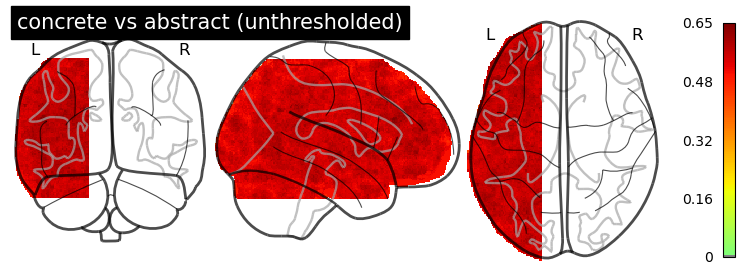

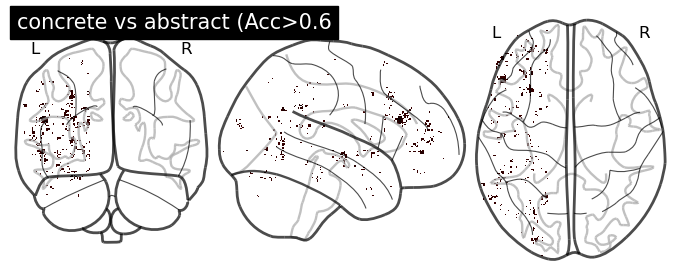

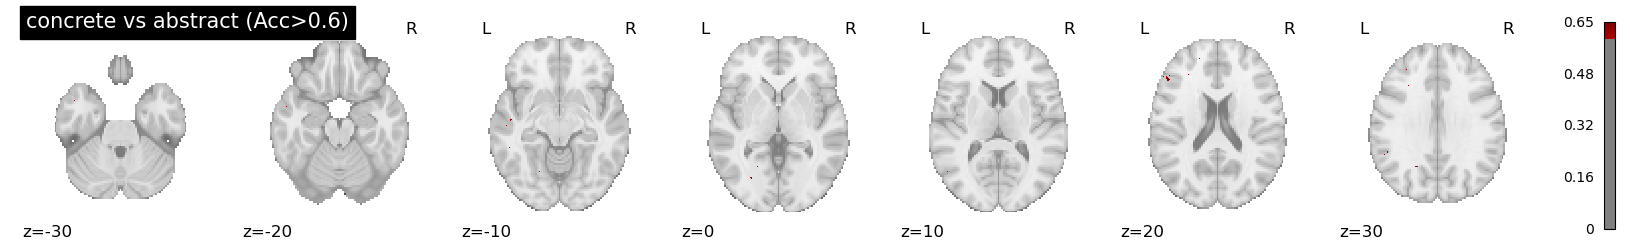

In [28]:
from nilearn.plotting import plot_glass_brain
mask_wb_filename='/work/JiaqiZhao#1783/82777/BIDS/derivatives/sub-0081/anat/sub-0081_acq-T13D_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
#mask_wb_filename='/work/JiaqiZhao#1783/82777/BIDS/derivatives/sub-0081/anat/sub-0081_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
anat_filename='/work/JiaqiZhao#1783/82777/BIDS/derivatives/sub-0081/anat/sub-0081_acq-T13D_run-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
#anat_filename='/work/JiaqiZhao#1783/82777/BIDS/derivatives/sub-0081/anat/sub-0081_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'


#Create an image of the searchlight scores
searchlight_img = new_img_like(anat_filename, searchlight.scores_)

plot_glass_brain(searchlight_img, cmap='jet',colorbar=True, threshold=0.01,
                          title='concrete vs abstract (unthresholded)',
                          plot_abs=False)

plot_glass_brain(searchlight_img,threshold=0.6,title='concrete vs abstract (Acc>0.6')


plot_stat_map(searchlight_img, cmap='jet',threshold=0.6, cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='concrete vs abstract (Acc>0.6)')
plt.show()

### Find the 500 most predictive voxels 

In [29]:
print(searchlight.scores_.size)
#Find the percentile that makes the cutoff for the 100 best voxels
perc=100*(1-500.0/searchlight.scores_.size)
#Print percentile
print(perc)
#Find the cutoff
cut=np.percentile(searchlight.scores_,perc)
#Print cutoff
print(cut)
#cut=0
#Make a mask using cutoff

#Load the whole brain mask
mask_img2 = load_img(mask_wb_filename)

# .astype() makes a copy.
process_mask2 = mask_img2.get_data().astype(np.int)
process_mask2[searchlight.scores_<=cut] = 0
process_mask2_img = new_img_like(mask_img2, process_mask2)



8980290
99.9944322510743
0.6003694581280787


/tmp/ipykernel_3074/4168517606.py:17: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  process_mask2 = mask_img2.get_data().astype(np.int)
/tmp/ipykernel_3074/4168517606.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  process_mask2 = mask_img2.get_data().astype(np.int)
/tmp/ipykernel_

### Visualization of the voxels

/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


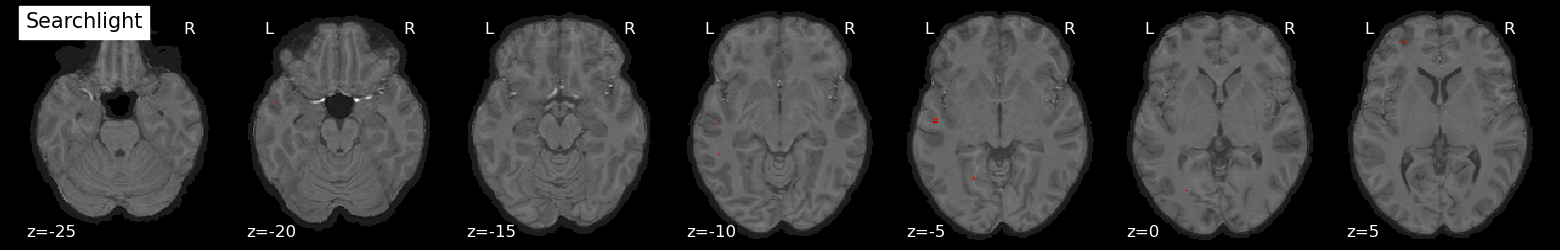

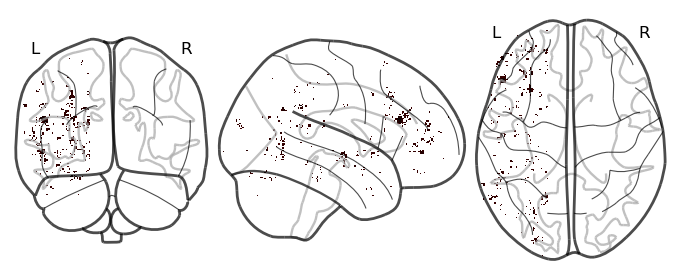

In [30]:
# --------------
from nilearn import image
from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn import plotting
%matplotlib inline
#Create an image of the searchlight scores
searchlight_img = new_img_like(anat_filename, searchlight.scores_)
#Plot the searchlight scores on an anatomical background
plot_img(searchlight_img, bg_img=anat_filename,#bg_img=mean_fmri,
         title="Searchlight", display_mode="z",cut_coords=[-25,-20,-15,-10,-5,0,5],
         vmin=.40, cmap='jet', threshold=cut, black_bg=True)
#plotting.plot_glass_brain effects
plotting.plot_glass_brain(searchlight_img,threshold=cut)

In [31]:
### Make a classification on the 2nd split using the best voxels

In [32]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=process_mask2_img, standardize=False)

# We use masker to retrieve a 2D array ready
# for machine learning with scikit-learn
fmri_masked = masker.fit_transform(fmri_img2)
#Print size of matrix (images x voxels)
print(fmri_masked.shape)


from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(LinearSVC(penalty='l2'), fmri_masked, conditions2, cv=10)
print(cv_score)
print('Mean prediction score:')
print(np.mean(cv_score))

/opt/conda/lib/python3.10/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


(72, 500)
[0.5        0.625      0.28571429 0.57142857 0.         0.42857143
 0.71428571 0.42857143 0.71428571 0.57142857]
Mean prediction score:
0.48392857142857143


### Perform a permutation test

In [33]:
from sklearn.model_selection import permutation_test_score
score, permutation_scores, pvalue= permutation_test_score(
    LinearSVC(penalty='l2'), fmri_masked, conditions2, cv=10, n_permutations=1000, 
    n_jobs=-1, random_state=0, verbose=0, scoring=None)
print("Classification Accuracy: %s (pvalue : %s)" % (score, pvalue))

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Classification Accuracy: 0.48392857142857143 (pvalue : 0.5734265734265734)


### View a histogram of permutation scores

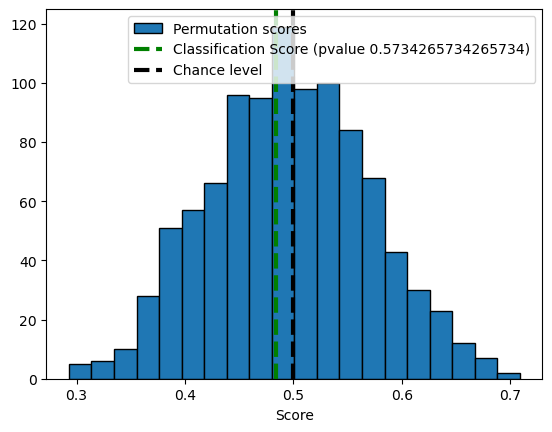

In [34]:
import numpy as np
import matplotlib.pyplot as plt
#How many classes
n_classes = np.unique(conditions2).size

plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Chance level')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

In [35]:
import ipyparallel as ipp

cluster = ipp.Cluster.from_file("/home/ucloud/.ipython/profile_default/security/cluster-.json")
rc = cluster.connect_client_sync()
rc